<a href="https://colab.research.google.com/github/joanby/trading-algoritmico-estadistica-probabilidad/blob/main/ES_EyP_Cap%C3%ADtulo_03_Probabilidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="45px" src="https://www.quantreo.com/wp-content/uploads/2021/10/Original-on-Transparent.png" align="left" hspace="10px" vspace="0px">
<img alt="Colaboratory logo" height="45px" src="https://static-881c.kxcdn.com/wp-content/uploads/2016/03/frogamesLogoFull4.png" align="left" hspace="10px" vspace="0px"></p>


# Probabilidad


<br>

### Después de este capítulo serás capaz de:
* Calcular y comprender las variables aleatoria
* Calcular y comprender la intersección, la unión y la independencia
* Calcular y comprender la probabilidad condicional
<br>
<br>
<br>

### Ejercicio (Trading):
* Aplicar la probabilidad condicional al mercado de valores 





<br>
<br>

💰 Únete a la comunidad de [Discord](https://discord.gg/z3dx5XpkX4)

📚 Puedes leer nuestro libro en [Amazon](https://www.amazon.es/Python-para-finanzas-trading-algor%C3%ADtmico-ebook/dp/B0BT4ZS9Q3/)

🖥️ El canal de [YouTube de Quantreo's](https://www.youtube.com/channel/UCp7jckfiEglNf_Gj62VR0pw) (en inglés) y el de [Frogames](https://www.youtube.com/channel/UCMUxXNYrVCv6-bQakhomvBg) en español


In [15]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
!pip install ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install scipy==1.7.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 28.5 MB 12.3 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [4]:
import numpy as np
import pandas as pd
import yfinance as yf

import warnings
warnings.filterwarnings("ignore")

In [5]:
# El código aquí te permitirá cambiar sus gráficos a modo oscuro para aquellos que elijan programar en modo oscuro
import matplotlib.pyplot as plt

import matplotlib as mpl
from matplotlib import cycler
colors = cycler('color',
                ['#669FEE', '#66EE91', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('figure', facecolor='#313233')
plt.rc('axes', facecolor="#313233", edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors,
       labelcolor='gray')
plt.rc('grid', color='474A4A', linestyle='solid')
plt.rc('xtick', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('legend', facecolor="#313233", edgecolor="#313233")
plt.rc("text", color="#C9C9C9")

In [6]:
# Importar los datos y crear variaciones porcentuales de GOOGLE
df = yf.download("GOOG")[["Adj Close"]].pct_change(1).dropna()
df

[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
2004-08-20,0.079430
2004-08-23,0.010064
2004-08-24,-0.041408
2004-08-25,0.010775
2004-08-26,0.018019
...,...
2022-07-01,-0.002665
2022-07-05,0.044059
2022-07-06,0.011648


# Probabilidad

In [7]:
# Calcula la probabilidad de una subida
p_increase = len(df[df["Adj Close"]>0])/len(df)*100

# Calcula la probabilidad de una bajada
p_decrease = len(df[df["Adj Close"]<0])/len(df)*100

# %Subida + %Bajada deben sumar (casi)  1
print(f"Probabilidades| \t Subida: {'%.2f' % p_increase} \t Bajada: {'%.2f' % p_decrease}")

Probabilidades| 	 Subida: 52.60 	 Bajada: 47.38


# Probabilidad Condicionada

In [8]:
# Clase de las bandas de Bollinger
from ta.volatility import BollingerBands

In [9]:
# Importar los datos "Estacionarios"

# Importar el precio de cierre
df = yf.download("EURUSD=X")[["Adj Close"]]

# Creamos el retorno
df["return"] = df["Adj Close"].pct_change(1).dropna()

[*********************100%***********************]  1 of 1 completed


In [10]:
# Inicializamos la clase BB
indicator_bb = BollingerBands(close=df["Adj Close"], window=20, window_dev=1.5)

# Añadimos las bandas de Bollinger
df['bb_bbm'] = indicator_bb.bollinger_mavg()
df['bb_bbh'] = indicator_bb.bollinger_hband()
df['bb_bbl'] = indicator_bb.bollinger_lband()

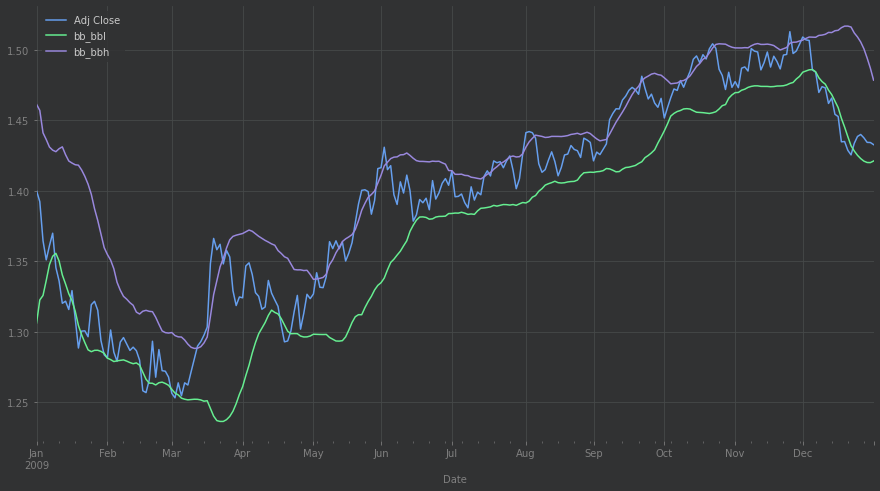

In [11]:
df[['Adj Close', 'bb_bbl', 'bb_bbh']].loc["2009"].plot(figsize=(15,8))

In [25]:
# Importamos el precio de cierre
df = yf.download("ETH-USD")[["Adj Close"]]

# Creamos el retorno
df["return"] = df["Adj Close"].pct_change(1).dropna()

# Inicializamos la clase BB
indicator_bb = BollingerBands(close=df["Adj Close"], window=20, window_dev=1.5)

# Añadimos las bandas de Bollinger
df['bb_bbm'] = indicator_bb.bollinger_mavg()
df['bb_bbh'] = indicator_bb.bollinger_hband()
df['bb_bbl'] = indicator_bb.bollinger_lband()


# Desplazamos los valores
df["Adj Close Yesterday"] = df["Adj Close"].shift(1)
df["bbh Yesterday"] = df["bb_bbh"].shift(1)

# Eliminar la fila que contiene los valores que faltan
df = df.dropna()


# Inicialización de variables
n = 10
dates = []
returns = []

# 
for i in range(len(df)-n-1):
  row = df.iloc[i:i+1,:]
  
  # Creación de la condición de señal
  if (row["Adj Close Yesterday"].values[0] < row["bbh Yesterday"].values[0]) and\
  (row["Adj Close"].values[0] > row["bb_bbh"].values[0]):
    
    # Guardar la fecha
    dates.append(row.index[0])
    
    # Calcula los rendimientos de la señal 10 días después 
    ret = []
    for day in range(1,n):
      ret.append(df.iloc[i+day:i+1+day,:]["return"].values[0])
    returns.append(ret)

# Lista de listas a data frame
df_returns = pd.DataFrame(returns).cumsum(axis=1)

[*********************100%***********************]  1 of 1 completed


In [14]:
# Señal (1%, 0.5%, 0.8%, 0.5%, 0.5%, 6%, ...) -> (1%, 1.5%, 2.3%, 2.8%, 3.3%, 9.3%...)
df_returns

,0,1,2,3,4,5,6,7,8
0,0.264581,0.343386,0.333495,0.317157,0.334340,0.368477,0.472189,0.512682,0.503325
1,0.088503,0.107410,0.124535,0.168595,0.275624,0.271600,0.403256,0.369464,0.289126
2,0.096780,0.075547,0.020783,-0.163617,-0.201048,-0.179327,-0.176606,-0.064923,-0.156313
3,0.017744,0.078014,0.039355,0.023209,0.066747,0.148875,0.233098,0.216332,0.243529
4,0.082128,0.166351,0.149585,0.176782,0.210050,0.312159,0.181197,0.258206,0.234403
...,...,...,...,...,...,...,...,...,...
70,-0.006321,0.031100,-0.018901,-0.067674,-0.071097,-0.082717,-0.065372,0.018624,0.002256
71,0.000310,-0.028811,-0.015695,0.010239,0.029725,0.055127,0.054680,0.066431,0.113644
72,0.019487,0.044888,0.044441,0.056192,0.103405,0.117094,0.136680,0.131733,0.101154
73,-0.001302,0.021273,0.020821,-0.010261,-0.080635,-0.061219,-0.073961,-0.052081,-0.067425


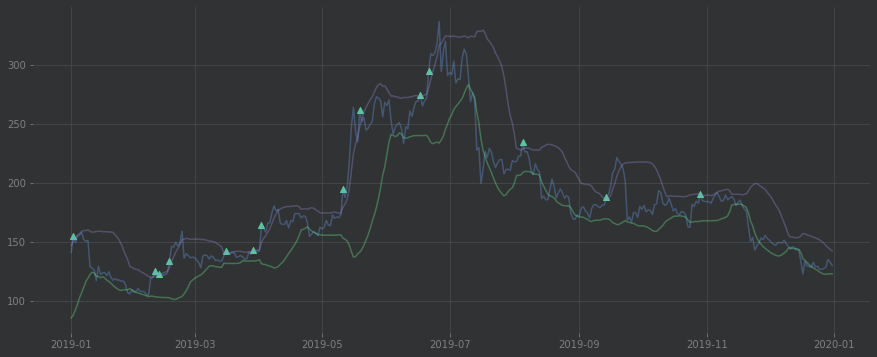

In [31]:
# Representamos todas las señales para asegurarnos de que son correctas

# Seleccionar toda la señal en una lista de índices para representar sólo estos puntos
idx = dates
year="2019"

# Adaptar el tamaño del gráfico
plt.figure(figsize=(15,6))

# Representamos los puntos de la señal larga abierta en verde
plt.scatter(df.loc[idx].loc[year].index, df.loc[idx]["Adj Close"].loc[year], color= "#57CE95", marker="^")

# Representamos los puntos de la señal larga cercana en azul

# Representamos el rsi para asegurarse de que las condiciones se completan
plt.plot(df["Adj Close"].loc[year].index, df["Adj Close"].loc[year], alpha=0.35)
plt.plot(df["bb_bbl"].loc[year].index, df["bb_bbl"].loc[year], alpha=0.35)
plt.plot(df["bb_bbh"].loc[year].index, df["bb_bbh"].loc[year], alpha=0.35)



# Mostrar la representación gráfica
plt.show()

In [33]:
# Computar %Aumento %Disminución de los rendimientos de la señal a 10 días
for i in range(n-1):
  g = df_returns.iloc[:,i:i+1].values - 0.01
  p_increase = len(g[g>0])/len(g)*100
  p_decrease = len(g[g<0])/len(g)*100

  print(f"Probabilidades día {i+1}| \t Aumento: {'%.2f' % p_increase} %\t Disminución: {'%.2f' % p_decrease} %")
print(f" ")

# Computar %Aumento %Disminución del activo en todas las situaciones
p_increase = len(df[df["return"]>0])/len(df)*100
p_decrease = len(df[df["return"]<0])/len(df)*100
print(f"Probabilidades| \t Aumento: {'%.2f' % p_increase} % \t Disminución: {'%.2f' % p_decrease} % ")

Probabilidades día 1| 	 Aumento: 42.67 %	 Disminución: 57.33 %
Probabilidades día 2| 	 Aumento: 57.33 %	 Disminución: 42.67 %
Probabilidades día 3| 	 Aumento: 57.33 %	 Disminución: 42.67 %
Probabilidades día 4| 	 Aumento: 56.00 %	 Disminución: 44.00 %
Probabilidades día 5| 	 Aumento: 58.67 %	 Disminución: 41.33 %
Probabilidades día 6| 	 Aumento: 58.67 %	 Disminución: 41.33 %
Probabilidades día 7| 	 Aumento: 62.67 %	 Disminución: 37.33 %
Probabilidades día 8| 	 Aumento: 68.00 %	 Disminución: 32.00 %
Probabilidades día 9| 	 Aumento: 65.33 %	 Disminución: 34.67 %
 
Probabilidades| 	 Aumento: 51.48 % 	 Disminución: 48.52 % 


In [34]:
n = 8

dft = df["Adj Close"].pct_change(n).dropna()

# Computar %Aumento %Disminución del activo en todas las situaciones
p_increase = len(dft[dft>0])/len(dft)*100
p_decrease = len(dft[dft<0])/len(dft)*100
print(f"Probabilidades| \t Aumento: {'%.2f' % p_increase} % \t Disminución: {'%.2f' % p_decrease} % ")

Probabilidades| 	 Aumento: 52.80 % 	 Disminución: 47.20 % 


# Contrastes de hipótesis 
Esta parte viene con el capítulo "Contrastes de hipótesis". No lo leas antes si no te sientes cómodo con ellos.

In [ ]:
import scipy
scipy.__version__

'1.7.1'

In [ ]:
from scipy.stats import ttest_ind

# H0: RETURN_bollinger ≤ RETURN_normal
# H1: RETURN_bollinger > RETURN_normal
# Alpha: 0.05=5%

p = ttest_ind(dft, df_returns.iloc[:,-1].values,alternative="less").pvalue
print(f"H0: Estrategia de retorno ≤ Retornos aleatorios \t p-valor: {np.round(p*100,2)} %")

H0: Strategy returns ≤ Random returns 	 p_value: 0.8 %


Tenemos un p-valor de ***0,8%***. Significa que hay un 0,8% de posibilidades de que la media de la rentabilidad de la estrategia sea inferior o igual a la media de la rentabilidad. Por lo tanto, podemos rechazar H0.